# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; 
5. Create meaningful visualizations to analyze the data;
6. Critically think and write about data;
---

## Important Dates

- Homework release: Fri 8 Oct 2021
- **Homework due**: Fri 22 Oct 2021, 23:59
- Grade release: Fri 29 Oct 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

In this project, we are going to analyze data from an experiment about *honesty*. 
Oftentimes, we are asked to confirm our honest intentions by signing **at the end** of a document. 
For example, in tax returns or insurance policy forms, we are often asked to sign our names under a text that reads 
something like "I hereby certify that the above statements are true and correct to the best of my knowledge."

However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they 
have reported. In that context, it could be that signing at **the beginning** rather than at the end of the document 
would decrease dishonesty, as those who are filling the form would be aware of the ethical requirements *before* they 
provide the information in the form.

This intuition has led researchers to partner up with a motorcycle insurance company to run a randomized experiment. 
In this insurance company (as well as in many others), customers had to report the exact *odometer kilometrage*¹ in 
order for the company to adjust the insurance premiums. Note that motorcycles with lower kilometrage are less likely to 
have issues, and thus will result in a lower *insurance premium*². Therefore, customers have an incentive to lie, 
reporting a kilometrage lower than the real value, in order to save money.

In the experiment, two different forms were created: one where the signing was done at the end, and another where the 
signing was done at the beginning. The insurance company then randomized these forms (i.e., each customer received
 exactly one form, each with probability 50%) and sent back the data that customers had provided. Some noteworthy 
 details on the experiment are that:

- All customers involved in the experiment already had a contract with the company and were simply renewing it. 
In the data that the company provided, they also report the odometer kilometrage for their previous contract.
Each policy, therefore, contains two contracts: the "updated" contract —where the experiment was conducted— and 
the "baseline" contract, which was the previous contract customers had with the company.
- A single insurance policy can insure up to 4 distinct motorcycles.

In this assignment, you will take the role of the researcher and work analyzing this data!

*Glossary:*
1. **odometer kilometrage:** the total distance the motorcycle has traveled.
2. **insurance premiums:** the amount of money one pays for an insurance policy.

---

## The data

The company provided you with a compressed `.tsv` file containing one row per policy. 
The `.tsv` has the following fields:

- `condition`: either `Sign Top` or `Sign Bottom`, depending on which form was sent.
- `id`: unique identifier for each insurance policy.
- `motorcycle_count`: number of motorcycles covered by the insurance policy.
- `baseline_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *previous (baseline)* contract. 
- `update_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *current (updated)* contract.

Some comments:

- Recall that a single policy can ensure up to 4 motorcycles, and thus, the suffixes [1-4] indicate that there are 4 
versions of these columns in the data (e.g., `baseline_motorcycle1`, `baseline_motorcycle2`, `baseline_motorcycle3`, 
`baseline_motorcycle4`). 
- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy 
insures one motorcycle,  only `baseline_motorcycle1` and `update_motorcycle1` will be filled).
- Note that we only have access to the odometer kilometrage reported by the customers, 
which may be different from the real kilometrage of the motorcycles.

In [1]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

### **Task 1** — 4pts

Your first task is to load the dataset into memory using pandas. 
**You should load the data directly from the compressed files.**

Here, the files at hand are rather small, and you could easily uncompress the files to disk and work with them as plain 
text. Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, 
this will often not be the case. Then, working with compressed files is key so that you don't receive email from your 
(often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your 
datasets. Another big advantage of compressing files is to simply read files faster. You will often find that reading
compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading
and writing to disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). 
Check the `error_bad_lines` or the `on_bad_lines` (depending on your pandas version) parameter on `read_csv`.

In [2]:
data_folder = './data/'
df = pd.read_csv(data_folder + 'data.tsv.gz', delimiter='\t', compression='gzip', error_bad_lines=False)
df.head(10)

b'Skipping line 2142: expected 11 fields, saw 27\n'


,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1
5,Sign Top,6,147738,167895,125820.0,164688.0,NaN,NaN,NaN,NaN,2
6,Sign Bottom,7,18780,49811,45402.0,54824.0,NaN,NaN,NaN,NaN,2
7,Sign Top,8,41930,80323,181416.0,229852.0,NaN,NaN,NaN,NaN,2
8,Sign Top,9,28993,63707,13291.0,28165.0,NaN,NaN,NaN,NaN,2
9,Sign Bottom,10,78382,127817,NaN,NaN,NaN,NaN,NaN,NaN,1


### Task 2 — 12pts

As a good data scientist, the first thing you do is to clean up the data and perform some small sanity checks.

1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate 
rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter 
these rows from the data (always keeping the first).

2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., 
the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). 
Also, the number of odometer readings for each contract should be the same as the number stated in the 
`motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.

3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? 
Visualize the distribution of the data and remove any extreme outliers.

4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing 
numerical data with outliers with the mean or the median? Why?

---

**Hint:** Here we are considering as outliers numbers that are not plausible in the context of motorcycle kilometrages.

### 2.1

In [3]:
print('unique id: ', df['id'].is_unique)
print("Before Cleaning up the id's :")
print("entries: ", len(df))
print("After Cleaning up the id's :")
df.drop_duplicates(subset=['id'], keep='first', inplace=True)
print("entries: ", len(df))
print('unique id: ', df['id'].is_unique)

unique id:  False
Before Cleaning up the id's :
entries:  13497
After Cleaning up the id's :
entries:  13488
unique id:  True


### 2.2

In [4]:
baseline = df[['baseline_motorcycle1', 'baseline_motorcycle2', 'baseline_motorcycle3', 'baseline_motorcycle4']]
updated = df[['update_motorcycle1', 'update_motorcycle2', 'update_motorcycle3', 'update_motorcycle4']]
df = df.loc[(updated.count(axis=1) == baseline.count(axis=1))]
print("entries: ", len(df))
df = df.loc[(updated.count(axis=1) == df['motorcycle_count'])]
print("entries: ", len(df))


entries:  13488
entries:  13488


Moreover, we noticed that there were non-contiguous entries in the dataset, for exemple entries for a motorcycle 1 and a motorcycle 4, but no motorcycle 2 or 3.


Even though those entries are not well fitted in the dataset, we decided to keep them because they have no effects in the frame of our study.

### 2.3

In [5]:
df.describe()


,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
count,1.348800e+04,1.348800e+04,1.348800e+04,5.648000e+03,5.648000e+03,1277.000000,1277.000000,326.000000,326.000000,13488.000000
mean,7.403514e+03,7.413998e+14,7.413998e+14,6.732597e+04,9.227763e+04,67657.320282,92849.408771,67827.975460,93374.279141,1.537589
std,7.657835e+04,8.610457e+16,8.610457e+16,6.022646e+04,6.188369e+04,64419.001860,66547.920222,54610.217241,56345.386070,0.614145
min,1.000000e+00,0.000000e+00,4.200000e+01,0.000000e+00,1.160000e+02,0.000000,155.000000,0.000000,622.000000,1.000000
25%,3.373750e+03,2.528125e+04,5.009600e+04,2.449825e+04,4.988875e+04,18500.000000,43872.000000,14284.750000,41525.500000,1.000000
50%,6.745500e+03,5.634150e+04,8.239750e+04,5.615750e+04,8.206100e+04,58821.000000,85645.000000,68181.000000,93387.500000,1.000000
75%,1.011725e+04,9.625925e+04,1.233340e+05,9.700000e+04,1.221915e+05,100000.000000,128037.000000,106882.000000,128940.500000,2.000000
max,8.888888e+06,1.000000e+19,1.000000e+19,1.000581e+06,1.030915e+06,884594.000000,931105.000000,217715.000000,244658.000000,4.000000


entries:  13486


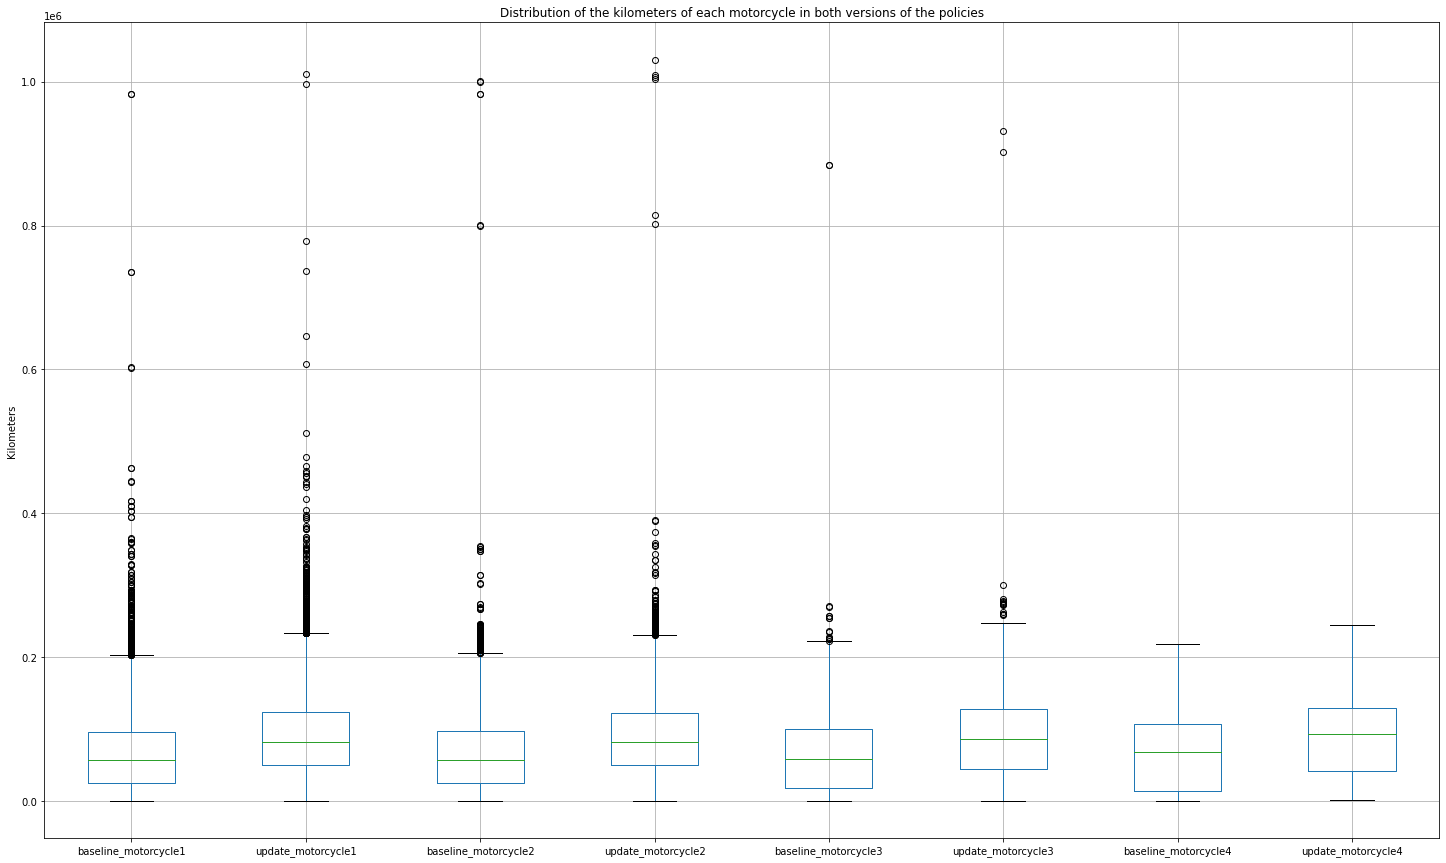

In [6]:
# We consider that above 10 million km is a lot
df = df.loc[(df.loc[:, 'baseline_motorcycle1':'update_motorcycle4'].fillna(0) < 10**7).all(axis=1)]
print("entries: ", len(df))

plt.rcParams['figure.figsize'] = [25, 15]
df.boxplot(column=['baseline_motorcycle1', 'update_motorcycle1', 'baseline_motorcycle2',  'update_motorcycle2','baseline_motorcycle3',  'update_motorcycle3', 'baseline_motorcycle4','update_motorcycle4'])
plt.title("Distribution of the kilometers of each motorcycle in both versions of the policies")
plt.ylabel("Kilometers")
plt.show()

### 2.4

If we couldn't remove outliers, it would be preferable to summarize data using the median. Indeed the median is robust to outliers whereas the mean isn't.


### Task 3 — 12pts

One of the challenges with the current data is that it is not clear how to handle policies with multiple motorcycles.

1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These 
should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average
 value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline 
 value.
2. **Discuss:** Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which 
this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in
 the study (sign at the top vs. sign at the bottom).
3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some 
additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the 
meaningful comparison of the values shown.
4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the 
standard deviation of these values (which should be in the column `update_average`).
5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different 
policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean 
and the standard deviation of the kilometrage per motorcycle in the updated contract.
6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different 
ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy 
**or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. 
According to questions 3.4 and 3.5, how may this decision influence the results of the study?
---

### 3.1

In [7]:
df['baseline_average'] = df[['baseline_motorcycle1', 'baseline_motorcycle2', 'baseline_motorcycle3', 'baseline_motorcycle4']].mean(axis=1, skipna=True)
df['update_average'] = df[['update_motorcycle1', 'update_motorcycle2', 'update_motorcycle3', 'update_motorcycle4']].mean(axis=1, skipna=True)
df['diff_average'] = df['update_average'] - df['baseline_average']

### 3.2

We could aggregate on the median of the motorcyles in each policy instead of the mean, because it is a more robust indicator to the outliers.

### 3.3

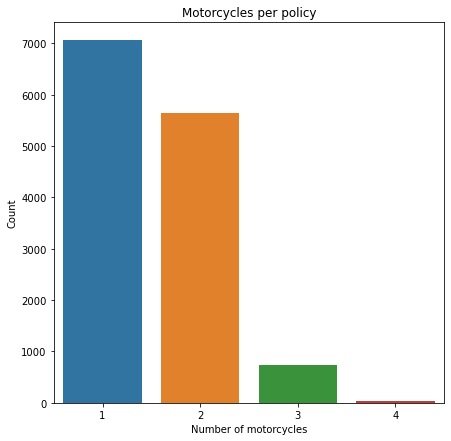

In [8]:
val, count = np.unique(df['motorcycle_count'], return_counts=True)
plt.rcParams['figure.figsize'] = [7, 7]
sns.barplot(x = val, y = count)
plt.xlabel('Number of motorcycles')
plt.ylabel('Count')
plt.title('Motorcycles per policy')
plt.show()

### 3.4

In [9]:
print("Updated values :")
print("Mean: {:.2f} STD : {:.2f} ".format(df['update_average'].mean(),df['update_average'].std()))

Updated values :
Mean: 92166.98 STD : 52212.86 


### 3.5

In [10]:
four_cycles = df[df['motorcycle_count']==4]
all_four_cycles = np.concatenate((four_cycles['update_motorcycle1'],four_cycles['update_motorcycle2'], four_cycles['update_motorcycle3'], four_cycles['update_motorcycle4']))
print("Values for all motorcycles on updated policies with 4 cycles : ")
print("Mean: {:.2f} STD : {:.2f} ".format(all_four_cycles.mean(),all_four_cycles.std()))

Values for all motorcycles on updated policies with 4 cycles : 
Mean: 113443.86 STD : 82911.91 


### 3.6

Analyzing the data at the policy level would allow us to study the behavior of the customer more precisely, because every choice of lying or not is general for a policy and not to a specific motorcycle.
However, if a customer were to lie on a single motorcyle, taking the average would hide the lie on the other ones. Also, the mean isn't robust to outliers.

### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally,
plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was 
done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the 
bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*
 conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

### 4.1

In [11]:
update_top = df[df['condition']== 'Sign Top']['update_average']
update_bottom = df[df['condition']== 'Sign Bottom']['update_average']
std_update_top = update_top.std()
std_update_bottom = update_bottom.std()
mean_update_top = update_top.mean()
mean_update_bottom = update_bottom.mean()
print('For updated contracts :')
print("Mean Top : {:.2f}    Mean Bottom : {:.2f} ".format(mean_update_top, mean_update_bottom))
print("STD Top : {:.2f}     STD Bottom : {:.2f} ".format(std_update_top, std_update_bottom))

For updated contracts :
Mean Top : 85794.62    Mean Bottom : 98692.36 
STD Top : 51704.29     STD Bottom : 51928.18 


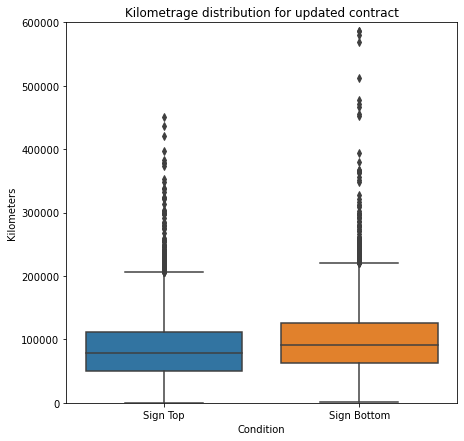

In [12]:
sns.boxplot(x='condition', y='update_average', data=df)
plt.ylim(0, 600000)
plt.title('Kilometrage distribution for updated contract')
plt.xlabel('Condition')
plt.ylabel('Kilometers')
plt.show()

### 4.2

In [13]:
print("Hypothesis that the updated values come from the same population : \n\n", stats.ttest_ind(update_top, update_bottom) )

Hypothesis that the updated values come from the same population : 

 Ttest_indResult(statistic=-14.452368101354606, pvalue=5.435352130291242e-47)


The p-value is smaller than 0.05, thus we can reject the null hypothesis that the two groups of motorcycles are equal. To conclude, we can assume that the difference between the two scenarios is statistically significant.

### 4.3



We can see in the histogram that it looks like the population of top signers have motorcycles with less kilometers.

Looking only at the mean values and the test result, we could think that signing top does not decrease dishonesty, although we can not conclude anything since the standard deviation is very high so the error margins are overlapping.

### 4.4

On the baseline contracts, we don't expect to see any significant differences between the two conditions since we assume that the signature on the updated contracts is the only difference between the two populations. 

### 4.5

In [14]:
base_top = df[df['condition']== 'Sign Top']['baseline_average']
base_bottom = df[df['condition']== 'Sign Bottom']['baseline_average']
std_base_top = base_top.std()
std_base_bottom = base_bottom.std()
mean_base_top = base_top.mean()
mean_base_bottom = base_bottom.mean()

print('For baseline contracts :')
print("Mean Top : {:.2f}    Mean Bottom : {:.2f} ".format(mean_base_top, mean_base_bottom))
print("STD Top : {:.2f}     STD Bottom : {:.2f} ".format(std_base_top, std_base_bottom))

For baseline contracts :
Mean Top : 59696.23    Mean Bottom : 75020.75 
STD Top : 49956.32     STD Bottom : 50256.59 


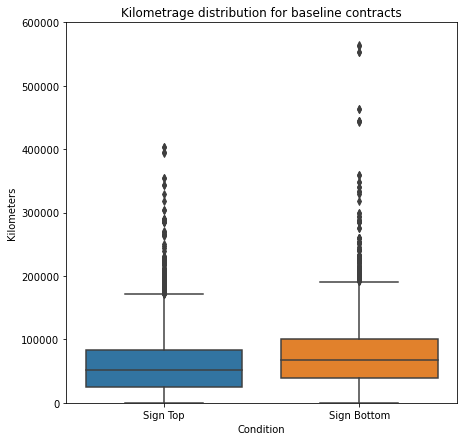

In [15]:
sns.boxplot(x='condition', y='baseline_average', data=df)
plt.ylim(0,600000)
plt.title('Kilometrage distribution for baseline contracts')
plt.xlabel('Condition')
plt.ylabel('Kilometers')
plt.show()

### 4.6

In [16]:
print("Hypothesis that the updated values come from the same population : \n\n", stats.ttest_ind(base_top, base_bottom) )

Hypothesis that the updated values come from the same population : 

 Ttest_indResult(statistic=-17.75773299430071, pvalue=9.333114026345824e-70)


Oddly enough, we also have to reject the null hypothesis that the motorcycles in the baseline contract are equal mean between the groups, wich points us towards the fact that the data is skewed.

## Interlude: Something is dodgy about this data...

---

Noticing the oddities in the data, you send an email to your contact at the insurance company asking about the integrity
 of the data. Their reply seems like something out of a detective movie:

> Dear researcher, I believe that this data is not to be trusted. I can't talk right now but will send further hints 
>throughout the week.

As a researcher, you know that [data integrity](https://en.wikipedia.org/wiki/Data_integrity) is a big deal, and decide
 to investigate.

### Task 5 — 9pts

The first hint you receive is: *there is something off about the kilometrage values in the data.*

1. For the baseline contract and for the updated contract, plot the distribution of odometer kilometrage reported for 
the first motorcycle insured in each policy. 
2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers
 reported in the baseline and in the updated contract.
3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

---

### 5.1

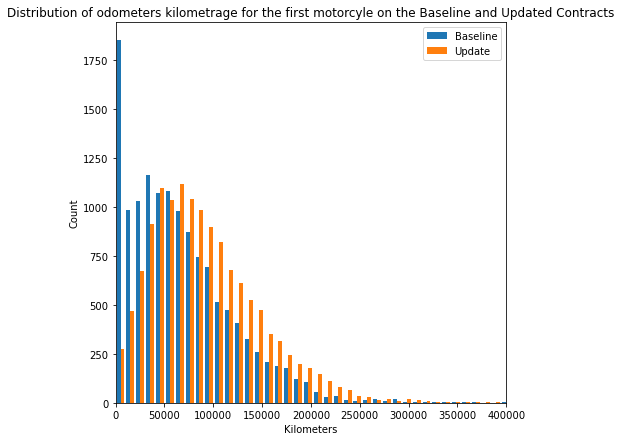

In [17]:
base_cycle1 = df['baseline_motorcycle1']
update_cycle1 = df['update_motorcycle1']

plt.hist(x=[base_cycle1, update_cycle1], bins=100, label=["Baseline", "Update"])
plt.xlim(0, 400000)
plt.xlabel("Kilometers")
plt.ylabel("Count")
plt.title("Distribution of odometers kilometrage for the first motorcyle on the Baseline and Updated Contracts")
plt.legend()
plt.show()

### 5.2

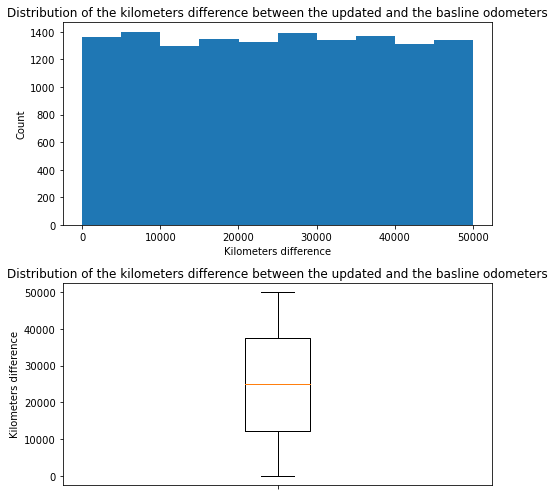

In [18]:
fig, ax = plt.subplots(2, 1)
diff_cycle1 = update_cycle1 - base_cycle1

plt.rcParams['figure.figsize'] = [10, 10]

ax[0].hist(diff_cycle1)
ax[0].set_title("Distribution of the kilometers difference between the updated and the basline odometers")
ax[0].set_xlabel("Kilometers difference")
ax[0].set_ylabel("Count")

ax[1].boxplot(diff_cycle1)
ax[1].set_title("Distribution of the kilometers difference between the updated and the basline odometers")
ax[1].set_xticklabels([]) #To remove the '1' in the x axis
ax[1].set_ylabel("Kilometers difference")

fig.tight_layout()
plt.show()

### 5.3

The data seems perfectly distributed between 0 and 50 000 kms, but we would expect the data to follow a normal distribution instead of a uniform one. Also, there are no outliers in the data and the quartiles are evenly spaced. We see that perfectly in the boxplot, which is a uniform-like boxplot. 

### Task 6 — 15pts

The second hint you receive is: *there is something off with the last digits of the reported kilometrages.*

1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the 
distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first 
motorcycle in each contract (`update_motorcycle1`).

3. **Discuss:** What are the differences between the two distributions?

4. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline
 kilometrage of the first motorcycle.
    
---

**Hint:** The last two digits of the number 12314 are 314. Note that you should consider the three last digits together,
 not separately!

### 6.1

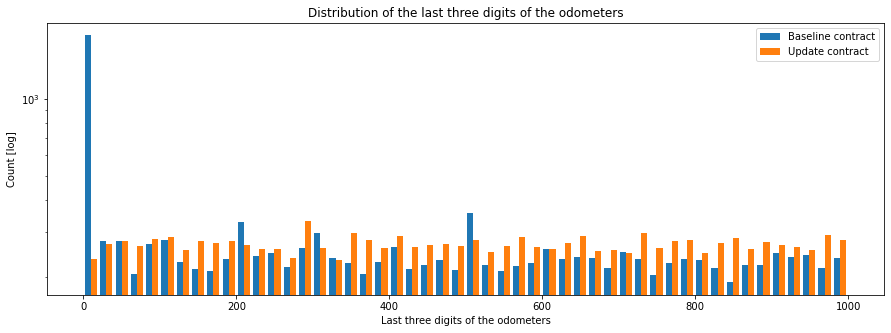

In [19]:
base_last3 = base_cycle1 % 1000
update_last3 = update_cycle1 % 1000

plt.rcParams['figure.figsize'] = [15, 5]
plt.hist([base_last3, update_last3], bins=50, label=["Baseline contract", "Update contract"])
plt.yscale('log') 
plt.title("Distribution of the last three digits of the odometers")
plt.xlabel("Last three digits of the odometers")
plt.ylabel("Count [log]") 
plt.legend()
plt.show()

### 6.2

A lot of motorcycles in the base contract have an odometer whose last three digits read close to 0 while the updated one looks more evenly distributed. For the baseline, there are some spikes at each hundreds and not for the updated ones.

### 6.3

There are two phenomenons to be put forward : 
Firstly, the spikes may be explained by the people rounding their odometer to the closest hundreds, which is a common human behavior.
Secondly, we have seen in the previous task (5.1), that there are a lot of newer and unused motorcycles in the baseline contracts, which could explain the spikes at zero.

### Task 7 — 15pts

The third (and last) hint you receive is: *there is something wrong with the fonts.*

Your anonymous source explains that the `.tsv` file sent to you was derived from an Excel sheet. There, some of the rows
 were written in the font *Helvetica* while others were written in the font *Arial*. Your anonymous source sends you a 
 file with the relation between policy id and the font used in the respective row (`fonts.csv`), and tells you that the
  rows with *Helvetica* font were fabricated.

1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial 
and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font 
and for rows with the Helvetica font.
3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in 
each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract
 (`update_motorcycle1`).
4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

---

### 7.1

In [20]:
fonts = pd.read_csv((data_folder + 'fonts.csv'), error_bad_lines=False)
fonts.drop_duplicates(keep='first', inplace=True)
df_fonts = df.merge(fonts, on='id')
df_fonts.head()


,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average,font
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0,Helvetica
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5,Helvetica
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0,Helvetica
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0,Helvetica
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0,Arial


### 7.2

Helvetica rows:  6742 Arial rows:  6744


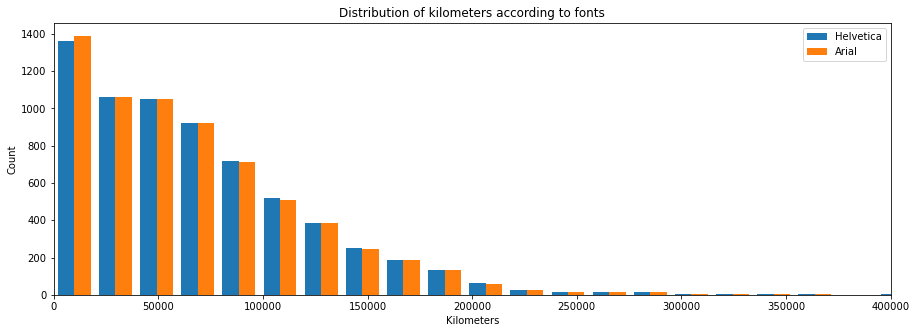

In [21]:
helv_first = df_fonts[df_fonts['font']=='Helvetica']['baseline_motorcycle1']
arial_first = df_fonts[df_fonts['font']=='Arial']['baseline_motorcycle1']

plt.hist([helv_first, arial_first], bins = 50, label=["Helvetica", "Arial"])
plt.xlim(0, 400000)
plt.legend()
print("Helvetica rows: ", len(helv_first), "Arial rows: ", len(arial_first))
plt.xlabel("Kilometers")
plt.ylabel("Count")
plt.title("Distribution of kilometers according to fonts")
plt.show()

### 7.3

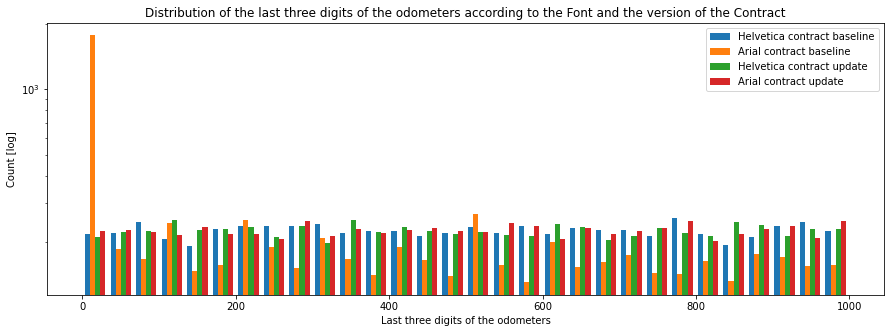

In [22]:
helv_first = helv_first % 1000
arial_first = arial_first % 1000

helv_update = df_fonts.loc[df_fonts['font']=='Helvetica']['update_motorcycle1']
arial_update = df_fonts.loc[df_fonts['font']=='Arial']['update_motorcycle1']

helv_update = helv_update % 1000
arial_update = arial_update % 1000

plt.rcParams['figure.figsize'] = [15, 5]
plt.hist([helv_first, arial_first, helv_update, arial_update], bins=30, label=["Helvetica contract baseline", "Arial contract baseline", "Helvetica contract update", "Arial contract update"])
plt.yscale('log')
plt.title("Distribution of the last three digits of the odometers according to the Font and the version of the Contract")
plt.xlabel("Last three digits of the odometers")
plt.ylabel("Count [log]")
plt.legend()
plt.show()

### 7.4
The spikes that we spotted around zero of the last three digits (6.1) in the baseline contracts, should not be from only a single font. Indeed, we see on the previous plot (7.2) that the distribution of the overall kilometrage is the same for the two fonts, so that doesn't make any sense.

### Task 8 — 15pts

You've had enough! You decide to write an email to your PI (principal investigator, also known as "your boss") reporting
 the oddities you have observed in the data. Write a (brief) text (in markdown) of up to 300 words. Your text should:

- Use the analyses you did to make a convincing case that the data has been tampered with. 
- Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
- Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.

Structure your text into three bullets, analogous to the ones above.

You can reference images present in the notebook by indicating a task (e.g., image plotted in Task 3.3) or a cell 
number.

Note that you do not need to conduct any additional analysis to write this text. If you do, the code should be at the 
end of this notebook, i.e., after your answer.

---

**Hint:** The data has been tampered with in more than one way.

- First, rejecting the hypothesis that the data comes from the same population for the baseline contract is very suspicious (4.6). Secondly, by looking at the difference of the odometer between the updated and the baseline contract for the first motorbike, we can see a uniform distribution from 0 to 50000 and no outlier at all (5.2). We would expect a normal distribution. Then, we can see that in the baseline contract there was a trend to round the odometer (6.3). Nothing surprising, it is a normal human behavior. But then why can't we notice the same phenomenon in the updated contract? Probably because those data do not come from a human. Finally, I discovered that there were two different fonts in the data and separating both, they have the same distribution, but a significant difference lies between them when we look at the three last digits : a huge peak at zero and a smaller one at 500 for the Arial font for the baseline contract but nothing particular for the Helvetica (7.2 and 7.3). This shows that the baseline Helvetica are probably fabricated.


- I think that more than half of the data were created. First, the updated data were made for the difference between the updated and the baseline odometer to fit a uniform distribution from 0 to 50 000. I also think that the baseline data are not all authentic. It seems that they were duplicated : the values are slightly different (on the last three digits) but they both have the same distribution at large scale. 


- As for the honesty experiment, it is hard to obtain certain result with tampered in data. If we forget about all those oddities, we have some contradiction in the statistic tests, thus we cannot conclude anything.
 
 